In [35]:
# MNISTデータダウンロード
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [4]:
# インポートセット
from keras.datasets import mnist
import numpy as npy
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# データの保存
npy.savez('mnist_raw.npz',x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)


In [2]:
# データの読み出し
mnist_raw_data = npy.load('mnist_raw.npz')

x_train=mnist_raw_data['x_train']
y_train=mnist_raw_data['y_train']
x_test=mnist_raw_data['x_test']
y_test=mnist_raw_data['y_test']


In [48]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [49]:
print(y_train[0])

5


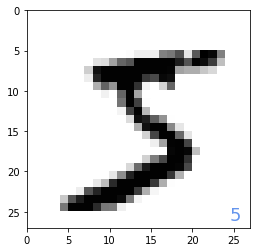

In [57]:
# データのイメージ出力
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(4,4))
plt.subplots_adjust(wspace=0.5)
plt.gray()

# プロットの色を設定
plt.subplot(1,1,1)
img=x_train[0,:,:]
plt.pcolor(255-img)
plt.text(24.5,26,"%d"%y_train[0],color='cornflowerblue',fontsize=18)
plt.xlim(0,27)
plt.ylim(27,0)
plt.show()

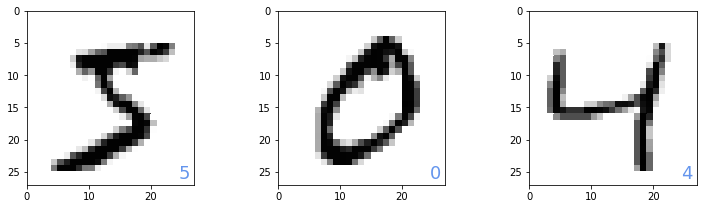

In [42]:
import numpy as npy
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1)
    img=x_train[id,:,:]
    plt.pcolor(255-img)
    plt.text(24.5,26,"%d"%y_train[id],color='cornflowerblue',fontsize=18)
    plt.xlim(0,27)
    plt.ylim(27,0)
plt.show()


In [3]:
#データ整形
from keras.utils import np_utils

# 28×28⇒784配列変換
x_train=x_train.reshape(60000,784)
# 0-255⇒0-1に変換
x_train=x_train.astype('float32')
x_train=x_train/255
# 1-of-K符号化法で表現
num_classes=10
y_train=np_utils.to_categorical(y_train,num_classes)

x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test=x_test/255
y_test=np_utils.to_categorical(y_test,num_classes)

print(x_train[0,150:200])
print(y_train[0])

[0.         0.         0.01176471 0.07058824 0.07058824 0.07058824
 0.49411765 0.53333336 0.6862745  0.10196079 0.6509804  1.
 0.96862745 0.49803922 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.11764706 0.14117648 0.36862746 0.6039216
 0.6666667  0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235295 0.6745098  0.99215686 0.9490196  0.7647059  0.2509804
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# ニューラルネットワークモデルの定義
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
npy.random.seed

model=Sequential()
model.add(Dense(16,input_dim=784,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])


In [25]:
# 学習の実行
import time

start_time=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1000,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('TEST loss:', score[0])
print('TEST accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time()-start_time))


Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 2.0330 - accuracy: 0.3934 - val_loss: 1.7390 - val_accuracy: 0.6450
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 1.5824 - accuracy: 0.6875 - val_loss: 1.4216 - val_accuracy: 0.7543
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 1.3146 - accuracy: 0.7682 - val_loss: 1.1925 - val_accuracy: 0.8066
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 1.1146 - accuracy: 0.8099 - val_loss: 1.0190 - val_accuracy: 0.8321
Epoch 5/10
60/60 [==============================] - ETA: 0s - loss: 0.9825 - accuracy: 0.82 - 0s 3ms/step - loss: 0.9610 - accuracy: 0.8319 - val_loss: 0.8849 - val_accuracy: 0.8491
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8406 - accuracy: 0.8477 - val_loss: 0.7784 - val_accuracy: 0.8614
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7453 - accuracy: 0.8600 - val_loss: 0.6945 -

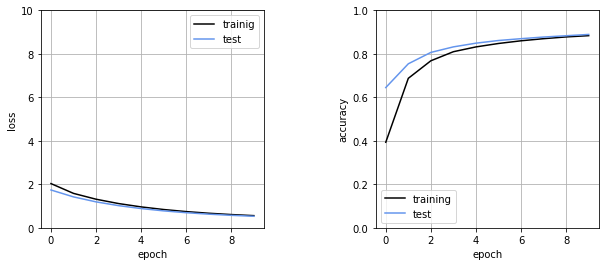

In [26]:
# 経過表示
plt.figure(1,figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

# 交差エントロピー誤差の経過表示
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='trainig',color='black')
plt.plot(history.history['val_loss'],label='test',color='cornflowerblue')
plt.ylim(0,10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

# 正答率の経過表示
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training',color='black')
plt.plot(history.history['val_accuracy'],label='test',color='cornflowerblue')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


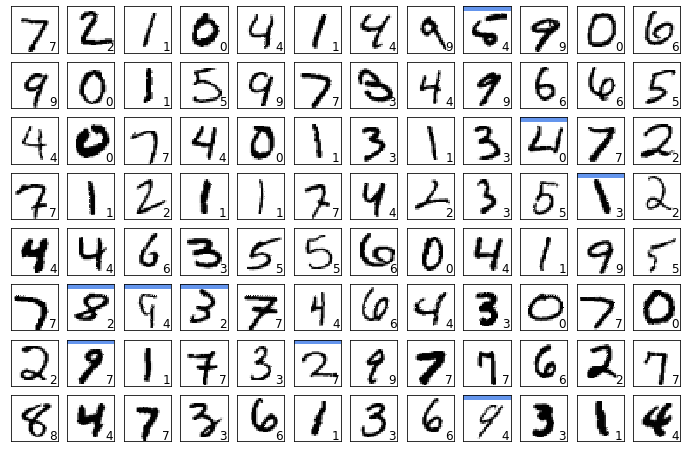

In [27]:
# テストデータの投入
def show_prediction():
    n_show = 96
    y=model.predict(x_test)
    plt.figure(2,figsize=(12,8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8,12,i+1)
        x=x_test[i,:]
        x=x.reshape(28,28)
        plt.pcolor(1-x)
        wk=y[i,:]
        prediction=npy.argmax(wk)
        plt.text(22,25.5,"%d"% prediction,fontsize=12)
        if prediction != npy.argmax(y_test[i,:]):
            plt.plot([0,27],[1,1],color='cornflowerblue',linewidth=5)
        plt.xlim(0,27)
        plt.ylim(27,0)
        plt.xticks([],"")
        plt.yticks([],"")

show_prediction()
plt.show()